In [42]:
import pandas as pd
import seaborn as sns

In [43]:
returns = pd.read_csv("Returns.csv")

In [44]:
ordersDF = pd.read_csv("Orders.csv")

In [45]:
ordersDF['Profit'] = ordersDF.Profit.apply(lambda x: x.replace('$',''))
ordersDF['Profit'] = ordersDF.Profit.apply(lambda x: x.replace(' ',''))
ordersDF['Profit'] = ordersDF.Profit.apply(lambda x: x.replace(',',''))
ordersDF['Profit'] = pd.to_numeric(ordersDF['Profit'])

In [46]:
ordersDF['Sales'] = ordersDF.Sales.apply(lambda x: x.replace('$',''))
ordersDF['Sales'] = ordersDF.Sales.apply(lambda x: x.replace(' ',''))
ordersDF['Sales'] = ordersDF.Sales.apply(lambda x: x.replace(',',''))
ordersDF['Sales'] = pd.to_numeric(ordersDF['Sales'])

In [47]:
# ordersDF

In [48]:
print(ordersDF['Sales'].mean())
print(ordersDF['Profit'].mean())

246.49068531878765
28.610970364593253


In [49]:
#Check averages for Order Priority, is there an increase in price for urgency
ordersDF.groupby('Order.Priority').mean()

,Row.ID,Postal.Code,Sales,Quantity,Discount,Profit,Shipping.Cost
Order.Priority,,,,,,,
Critical,26046.747457,54771.961686,250.822930,3.417854,0.136516,31.593141,59.747440
High,25751.321141,55597.518410,245.632546,3.485001,0.143341,27.119091,32.933931
Low,24655.840347,58667.250000,234.251716,3.422855,0.142200,24.197966,27.139061
Medium,25617.670574,54765.879159,247.371836,3.484354,0.143592,29.361721,18.579989


In [50]:
#Create month column to see if there is seasonility by month
ordersDF['month'] = pd.DatetimeIndex(ordersDF['Order.Date']).month
ordersDF.groupby('month').mean()

,Row.ID,Postal.Code,Sales,Quantity,Discount,Profit,Shipping.Cost
month,,,,,,,
1,27372.238606,55556.811370,259.206932,3.397932,0.139840,28.127327,27.278893
2,27200.339973,57110.829582,251.086560,3.363060,0.139237,33.015926,27.106510
3,26303.027935,54538.385757,252.915976,3.455271,0.143783,30.553193,25.515106
4,25041.813325,52350.317147,229.544479,3.451847,0.147805,24.347813,24.760180
5,25947.085028,53780.039422,241.746301,3.484552,0.143602,28.246652,26.938256
6,24878.453037,53376.502140,238.038719,3.396643,0.149176,27.273548,25.742014
7,26149.461659,54103.873418,235.463681,3.457277,0.150546,23.951643,26.274351
8,26576.314511,57220.478138,255.541076,3.474038,0.132269,30.521911,27.044568
9,25522.281638,53799.102026,240.307823,3.437227,0.137205,28.483709,25.110727


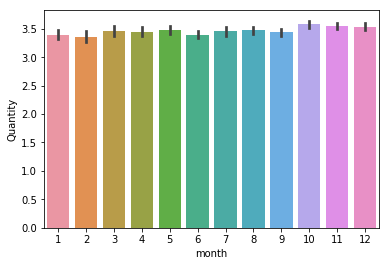

In [51]:
#plot month to see if there is seasonality
sns.barplot(x='month', y='Quantity', data=ordersDF)
ordersDF['monYr'] = pd.to_datetime(ordersDF['Order.Date']).dt.to_period('M')

In [52]:
#Convert Order Date to date time object check seasonality by day,month,year -- can we see an increase in Order amounts
ordersDF['Order.Date']= pd.to_datetime(ordersDF['Order.Date']) 

In [53]:
ordersDF

,Row.ID,Order.ID,Order.Date,Ship.Date,Ship.Mode,Customer.ID,Customer.Name,Segment,Postal.Code,City,...,Sub.Category,Product.Name,Sales,Quantity,Discount,Profit,Shipping.Cost,Order.Priority,month,monYr
0,40098,CA-2014-AB10015140-41954,2014-11-11,11/13/14,First Class,AB-100151402,Aaron Bergman,Consumer,73120.0,Oklahoma City,...,Phones,Samsung Convoy 3,221.98,2,0.00,62.15,40.770,High,11,2014-11
1,26341,IN-2014-JR162107-41675,2014-02-05,2/7/14,Second Class,JR-162107,Justin Ritter,Corporate,NaN,Wollongong,...,Chairs,"Novimex Executive Leather Armchair, Black",3709.40,9,0.10,-288.77,923.630,Critical,2,2014-02
2,25330,IN-2014-CR127307-41929,2014-10-17,10/18/14,First Class,CR-127307,Craig Reiter,Consumer,NaN,Brisbane,...,Phones,"Nokia Smart Phone, with Caller ID",5175.17,9,0.10,919.97,915.490,Medium,10,2014-10
3,13524,ES-2014-KM1637548-41667,2014-01-28,1/30/14,First Class,KM-1637548,Katherine Murray,Home Office,NaN,Berlin,...,Phones,"Motorola Smart Phone, Cordless",2892.51,5,0.10,-96.54,910.160,Medium,1,2014-01
4,47221,SG-2014-RH9495111-41948,2014-11-05,11/6/14,Same Day,RH-9495111,Rick Hansen,Consumer,NaN,Dakar,...,Copiers,"Sharp Wireless Fax, High-Speed",2832.96,8,0.00,311.52,903.040,Critical,11,2014-11
5,22732,IN-2014-JM156557-41818,2014-06-28,7/1/14,Second Class,JM-156557,Jim Mitchum,Corporate,NaN,Sydney,...,Phones,"Samsung Smart Phone, with Caller ID",2862.68,5,0.10,763.28,897.350,Critical,6,2014-06
6,30570,IN-2012-TS2134092-41219,2012-11-06,11/8/12,First Class,TS-2134092,Toby Swindell,Consumer,NaN,Porirua,...,Chairs,"Novimex Executive Leather Armchair, Adjustable",1822.08,4,0.00,564.84,894.770,Critical,11,2012-11
7,31192,IN-2013-MB1808592-41378,2013-04-14,4/18/13,Standard Class,MB-1808592,Mick Brown,Consumer,NaN,Hamilton,...,Tables,"Chromcraft Conference Table, Fully Assembled",5244.84,6,0.00,996.48,878.380,High,4,2013-04
8,40099,CA-2014-AB10015140-41954,2014-11-11,11/13/14,First Class,AB-100151402,Aaron Bergman,Consumer,73120.0,Oklahoma City,...,Bookcases,"Sauder Facets Collection Library, Sky Alder Fi...",341.96,2,0.00,54.71,25.270,High,11,2014-11
9,36258,CA-2012-AB10015140-40974,2012-03-06,3/7/12,First Class,AB-100151404,Aaron Bergman,Consumer,98103.0,Seattle,...,Chairs,"Global Push Button Manager's Chair, Indigo",48.71,1,0.20,5.48,11.130,High,3,2012-03


In [65]:
#Mergeing returns with ordersDF
returns.rename(columns = {'Order ID':'Order.ID'}, inplace = True) 
merged = pd.merge(returns,ordersDF,how = "left", on="Order.ID")
merged_copy = merged[merged['Returned'] == 'Yes'].copy(deep=True)


,Returned,Order.ID,Region_x,Row.ID,Order.Date,Ship.Date,Ship.Mode,Customer.ID,Customer.Name,Segment,...,Sub.Category,Product.Name,Sales,Quantity,Discount,Profit,Shipping.Cost,Order.Priority,month,monYr
0,Yes,CA-2012-SA20830140-41210,Central US,31784,2012-10-28,10/30/12,First Class,SA-208301402,Sue Ann Reed,Consumer,...,Phones,Apple iPhone 5S,2735.95,6,0.20,341.99,752.510,High,10,2012-10
1,Yes,IN-2012-PB19210127-41259,Eastern Asia,30191,2012-12-16,12/19/12,First Class,PB-19210127,Phillip Breyer,Corporate,...,Tables,"Lesro Conference Table, with Bottom Storage",1715.16,2,0.00,720.36,725.570,Critical,12,2012-12
2,Yes,IN-2012-PB19210127-41259,Eastern Asia,30190,2012-12-16,12/19/12,First Class,PB-19210127,Phillip Breyer,Corporate,...,Bookcases,"Safco Classic Bookcase, Pine",2197.50,5,0.00,153.75,627.270,Critical,12,2012-12
3,Yes,IN-2012-PB19210127-41259,Eastern Asia,30187,2012-12-16,12/19/12,First Class,PB-19210127,Phillip Breyer,Corporate,...,Tables,"Lesro Round Table, with Bottom Storage",1356.03,3,0.00,311.85,458.970,Critical,12,2012-12
4,Yes,IN-2012-PB19210127-41259,Eastern Asia,30193,2012-12-16,12/19/12,First Class,PB-19210127,Phillip Breyer,Corporate,...,Chairs,"Office Star Swivel Stool, Adjustable",882.15,5,0.00,114.60,203.920,Critical,12,2012-12
5,Yes,IN-2012-PB19210127-41259,Eastern Asia,30189,2012-12-16,12/19/12,First Class,PB-19210127,Phillip Breyer,Corporate,...,Machines,"Okidata Calculator, Red",148.32,3,0.00,68.22,25.480,Critical,12,2012-12
6,Yes,IN-2012-PB19210127-41259,Eastern Asia,30194,2012-12-16,12/19/12,First Class,PB-19210127,Phillip Breyer,Corporate,...,Binders,"Acco Binder, Economy",45.45,3,0.00,14.04,17.730,Critical,12,2012-12
7,Yes,IN-2012-PB19210127-41259,Eastern Asia,30188,2012-12-16,12/19/12,First Class,PB-19210127,Phillip Breyer,Corporate,...,Envelopes,"Ames Interoffice Envelope, Security-Tint",95.04,2,0.00,13.26,12.590,Critical,12,2012-12
8,Yes,IN-2012-PB19210127-41259,Eastern Asia,30192,2012-12-16,12/19/12,First Class,PB-19210127,Phillip Breyer,Corporate,...,Labels,"Harbour Creations Shipping Labels, 5000 Label Set",23.70,2,0.00,9.48,5.090,Critical,12,2012-12
9,Yes,CA-2012-SC20095140-41174,Central US,35395,2012-09-22,9/27/12,Standard Class,SC-200951402,Sanjit Chand,Consumer,...,Binders,Ibico EPK-21 Electric Binding System,9449.95,5,0.00,4630.48,655.610,Medium,9,2012-09


In [69]:
#Creating a Year column and dropping duplicate order IDs to keep 1079 returns.
merged_copy['YEAR'] = pd.DatetimeIndex(merged_copy['Order.Date']).year
merged_copy = merged_copy.drop_duplicates(subset='Order.ID', keep='first', inplace=False)
merged_copy

,Returned,Order.ID,Region_x,Row.ID,Order.Date,Ship.Date,Ship.Mode,Customer.ID,Customer.Name,Segment,...,Product.Name,Sales,Quantity,Discount,Profit,Shipping.Cost,Order.Priority,month,monYr,YEAR
0,Yes,CA-2012-SA20830140-41210,Central US,31784,2012-10-28,10/30/12,First Class,SA-208301402,Sue Ann Reed,Consumer,...,Apple iPhone 5S,2735.95,6,0.20,341.99,752.510,High,10,2012-10,2012
1,Yes,IN-2012-PB19210127-41259,Eastern Asia,30191,2012-12-16,12/19/12,First Class,PB-19210127,Phillip Breyer,Corporate,...,"Lesro Conference Table, with Bottom Storage",1715.16,2,0.00,720.36,725.570,Critical,12,2012-12,2012
9,Yes,CA-2012-SC20095140-41174,Central US,35395,2012-09-22,9/27/12,Standard Class,SC-200951402,Sanjit Chand,Consumer,...,Ibico EPK-21 Electric Binding System,9449.95,5,0.00,4630.48,655.610,Medium,9,2012-09,2012
13,Yes,IN-2015-JH158207-42140,Oceania,25438,2015-05-16,5/18/15,Second Class,JH-158207,John Huston,Consumer,...,"Apple Smart Phone, Cordless",2863.35,5,0.10,858.90,581.880,Critical,5,2015-05,2015
17,Yes,IN-2014-LC168857-41747,Oceania,29629,2014-04-18,4/19/14,First Class,LC-168857,Lena Creighton,Consumer,...,"Sharp Wireless Fax, Laser",1601.64,5,0.10,587.19,511.470,Critical,4,2014-04,2014
18,Yes,ID-2013-AB1001527-41439,Eastern Asia,30267,2013-06-14,6/17/13,First Class,AB-1001527,Aaron Bergman,Consumer,...,"StarTech Printer, Wireless",1024.68,8,0.50,-286.92,487.320,Critical,6,2013-06,2013
20,Yes,ES-2015-RA1994545-42218,Western Europe,15162,2015-08-02,8/3/15,First Class,RA-1994545,Ryan Akin,Consumer,...,"Bush Classic Bookcase, Metal",1112.78,3,0.10,296.66,472.000,Critical,8,2015-08,2015
21,Yes,CA-2014-TB21280140-41724,Central US,34667,2014-03-26,3/26/14,Same Day,TB-212801402,Toby Braunhardt,Consumer,...,Logitech P710e Mobile Speakerphone,1287.45,5,0.00,244.62,457.140,Critical,3,2014-03,2014
22,Yes,ES-2014-JF15295120-41924,Southern Europe,18990,2014-10-12,10/12/14,Same Day,JF-15295120,Jason Fortune-,Consumer,...,"Enermax Router, Bluetooth",1549.98,6,0.00,139.32,443.920,Critical,10,2014-10,2014
23,Yes,IN-2014-NM1844527-41800,Eastern Asia,24361,2014-06-10,6/10/14,Same Day,NM-1844527,Nathan Mautz,Home Office,...,"Sharp Copy Machine, High-Speed",957.60,4,0.00,0.00,427.100,Critical,6,2014-06,2014


In [70]:
#How much they lost per year
merged_copy.groupby('YEAR').sum()['Profit']

YEAR
2012    13032.23
2013     5913.73
2014    11706.18
2015    12038.54
Name: Profit, dtype: float64

In [62]:
#Customers who returned more than once and 5 times.
customer_returns = merged_copy['Customer.ID'].value_counts()
print(customer_returns[customer_returns > 1].count())
customer_returns[customer_returns > 5].count()

547


46